In [1]:
import sys
sys.path.append("/usr/local/lib/python3.8/dist-packages/")
sys.path.append("../")

from PIL import Image
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
import snook.data.blender as blender
import snook.data.dataset as dataset
import snook.data.generator as generator
import torch

In [2]:
blender.excomuniate_default_cube()

colors = generator.COLORS
balls  = [f"../resources/fbx/ball_{color}.fbx" for color in colors]
cue    = "../resources/fbx/cue.fbx"
pool   = "../resources/fbx/pool.fbx"
hdri   = "../resources/hdri"

scene = generator.Scene(
    generator.cFiles(balls, cue, pool, hdri),
    generator.cTable((2.07793, 1.03677), (0.25, 0.20), 1.70342),
    generator.cDistances(0.1, 1.5, (10.0, 20.0)),
)

os.makedirs("renders", exist_ok=True)
os.makedirs("data", exist_ok=True)
for i in tqdm(range(2), desc="Generating"):
    scene.sample()
    scene.render(f"renders/{i}.png")
    scene.register(f"data/{i}.txt")

FBX Import: start importing ../resources/fbx/ball_black.fbx
FBX version: 7400
	FBX import: Prepare...
		Done (0.000242 sec)

	FBX import: Templates...
		Done (0.000092 sec)

	FBX import: Nodes...
		Done (0.000076 sec)

	FBX import: Connections...
		Done (0.000071 sec)

	FBX import: Meshes...
		Done (0.015270 sec)

	FBX import: Materials & Textures...
		Done (0.007618 sec)

	FBX import: Cameras & Lamps...
		Done (0.000237 sec)

	FBX import: Objects & Armatures...
		Done (0.000425 sec)

	FBX import: ShapeKeys...
		Done (0.000094 sec)

	FBX import: Animations...
		Done (0.000170 sec)

	FBX import: Assign materials...
		Done (0.000154 sec)

	FBX import: Assign textures...
		Done (0.005341 sec)

	FBX import: Cycles z-offset workaround...
		Done (0.000243 sec)

	Done (0.033644 sec)

Import finished.
FBX Import: start importing ../resources/fbx/ball_black.fbx
FBX version: 7400
	FBX import: Prepare...
		Done (0.001018 sec)

	FBX import: Templates...
		Done (0.000135 sec)

	FBX import: Nodes...

		Done (0.014133 sec)

	FBX import: Materials & Textures...
		Done (0.000532 sec)

	FBX import: Cameras & Lamps...
		Done (0.000079 sec)

	FBX import: Objects & Armatures...
		Done (0.000348 sec)

	FBX import: ShapeKeys...
		Done (0.000187 sec)

	FBX import: Animations...
		Done (0.000075 sec)

	FBX import: Assign materials...
		Done (0.000085 sec)

	FBX import: Assign textures...
		Done (0.000087 sec)

	FBX import: Cycles z-offset workaround...
		Done (0.000065 sec)

	Done (0.020637 sec)

Import finished.
FBX Import: start importing ../resources/fbx/ball_yellow.fbx
FBX version: 7400
	FBX import: Prepare...
		Done (0.000595 sec)

	FBX import: Templates...
		Done (0.000090 sec)

	FBX import: Nodes...
		Done (0.000072 sec)

	FBX import: Connections...
		Done (0.000070 sec)

	FBX import: Meshes...
		Done (0.015120 sec)

	FBX import: Materials & Textures...
		Done (0.000459 sec)

	FBX import: Cameras & Lamps...
		Done (0.000049 sec)

	FBX import: Objects & Armatures...
		Done (0.000317 sec

FBX version: 7400
	FBX import: Prepare...
		Done (0.000731 sec)

	FBX import: Templates...
		Done (0.000113 sec)

	FBX import: Nodes...
		Done (0.000094 sec)

	FBX import: Connections...
		Done (0.000100 sec)

	FBX import: Meshes...
		Done (10.060685 sec)

	FBX import: Materials & Textures...
		Done (0.002900 sec)

	FBX import: Cameras & Lamps...
		Done (0.000542 sec)

	FBX import: Objects & Armatures...
		Done (0.000362 sec)

	FBX import: ShapeKeys...
		Done (0.000066 sec)

	FBX import: Animations...
		Done (0.000169 sec)

	FBX import: Assign materials...
		Done (0.000861 sec)

	FBX import: Assign textures...
		Done (0.000176 sec)

	FBX import: Cycles z-offset workaround...
		Done (0.000064 sec)

	Done (10.600919 sec)

Import finished.


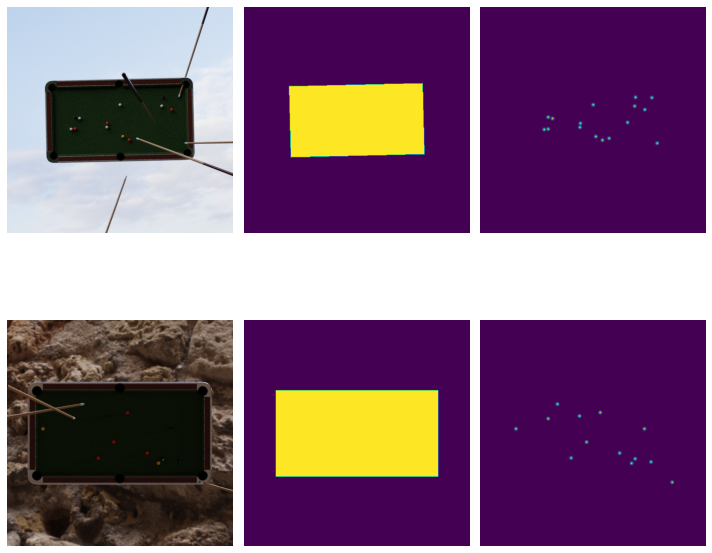

In [3]:
test_set = dataset.ReMaHeDataset("renders", "data", spread=4.0)

plt.figure(figsize=(10, 10))

with torch.no_grad():
    for i, (render, mask, heatmap) in enumerate(test_set):
        render = render.permute((1, 2, 0))
        
        plt.subplot(len(test_set), 3, 3 * i + 1)
        plt.imshow(render)
        plt.axis("off")
        
        plt.subplot(len(test_set), 3, 3 * i + 2)
        plt.imshow(mask)
        plt.axis("off")
        
        plt.subplot(len(test_set), 3, 3 * i + 3)
        plt.imshow(heatmap)
        plt.axis("off")
        
plt.tight_layout()
plt.show()

In [4]:
shutil.rmtree("renders")
shutil.rmtree("data")